<a href="https://colab.research.google.com/github/csestari/Estudos-de-Caso/blob/main/Avocado-Prices_An%C3%A1lise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Avocado Prices Dataset**                
**Kaggle datasets**


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install plotly

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Importar e ler o banco de dados em .csv**

In [ ]:
url = 'https://drive.google.com/u/1/uc?id=10rGQK_PmS8VjOg3LxHNR1U6uwSAD2ufa&export=download'
df = pd.read_csv(url)
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


**Para saber os tipos e a quantidade em cada type presentes no df**

In [ ]:
df['type'].value_counts().to_frame()

,type
conventional,9126
organic,9123


In [ ]:
df.shape

(18249, 14)

Somente as linhas que tem a **region** igual a **Albany**

In [ ]:
albany_df = df[df['region'] == "Albany"]
albany_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Trocar o indice


In [ ]:
albany_df = albany_df.set_index("Date")
albany_df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Agora que o indice é a data, tem como ter gráficos em relação ao tempo, por exemplo : **Gráfico de como se comportou o AveragePrice em relação ao tempo**

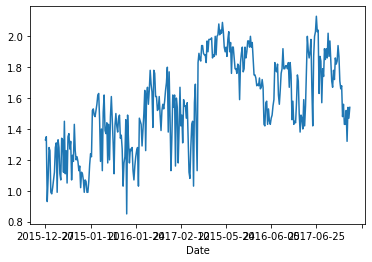

In [ ]:
df['Date'] = pd.to_datetime(df["Date"])
albany_df['AveragePrice'].plot()


Vemos que tem algo de errado, pois as datas não estão em ordem correta, vamos organiza-la com **sort_index**

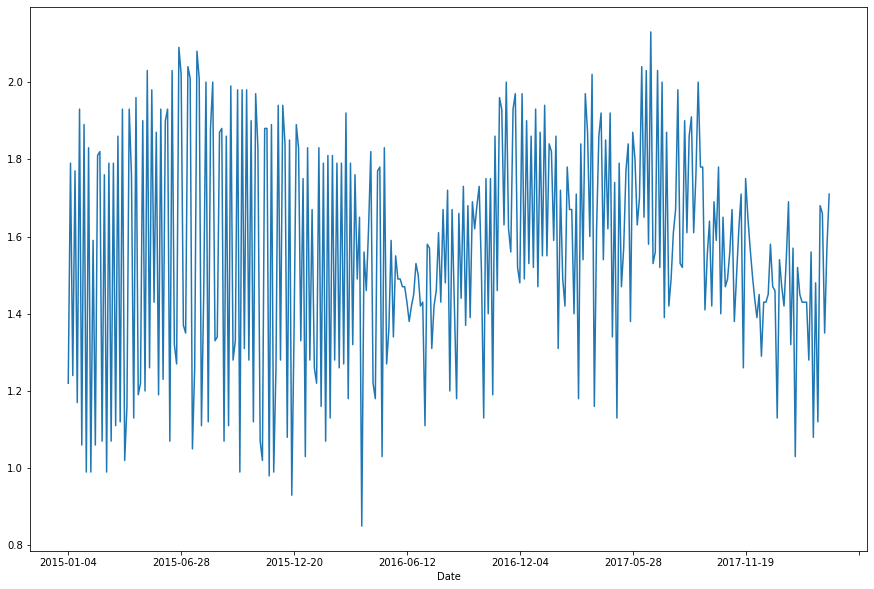

In [ ]:
albany_df.sort_index(inplace=True)
plt.figure(figsize=(15,10))
albany_df['AveragePrice'].plot()

Utilizei rolling() para obter a média movel, utilizei 25 janelas               
**Média móvel**: como neste exemplo, dividi os dados em 25 janelas e peguei a média da coluna 'AveragePrice', como cada linha é uma data, me resultou na média móvel do tempo

In [ ]:
##modo sem ser interativo -> albany_df['AveragePrice'].rolling(25).mean().plot()


##de um jeito mais bonito
fig = go.Figure(data=go.Scatter(x=albany_df.index, y=albany_df['AveragePrice'].rolling(25).mean(), mode='lines', marker=dict(color='blue')))
plt.figure(figsize=(10,6))
fig.show()

<Figure size 720x432 with 0 Axes>

In [ ]:
albany_df['Price25avgm'] = albany_df['AveragePrice'].rolling(25).mean()
albany_df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Price25avgm
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN
2015-01-11,50,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany,NaN
2015-01-18,49,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-11,2,1.68,2570.52,131.67,229.56,0.00,2209.29,2209.29,0.00,0.0,organic,2018,Albany,1.4224
2018-03-18,1,1.66,3154.45,275.89,297.96,0.00,2580.60,2577.27,3.33,0.0,organic,2018,Albany,1.4316
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany,1.4276


Agora irei excluir a coluna

In [ ]:
albany_df = albany_df.drop(columns=['Price25avgm'])
albany_df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2015-01-11,50,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany
2015-01-18,49,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-11,2,1.68,2570.52,131.67,229.56,0.00,2209.29,2209.29,0.00,0.0,organic,2018,Albany
2018-03-18,1,1.66,3154.45,275.89,297.96,0.00,2580.60,2577.27,3.33,0.0,organic,2018,Albany
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany


Vou criar um dataframe chamado **graph_df** que conterá a media movél de todas as cidades

In [ ]:
graph_df = pd.DataFrame()

for region in df['region'].unique():
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]] 
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston


In [ ]:
graph_df

Obtive uma quantidade absurda dados, isso porque temos dois types, vamos utilizar somente um tipo de **type** do dataframe


In [ ]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/u/1/uc?id=10rGQK_PmS8VjOg3LxHNR1U6uwSAD2ufa&export=download')
df = df.copy()[df['type']=='organic']

df["Date"] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", ascending=True, inplace=True)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9489,51,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.0,organic,2015,LasVegas
10893,51,2015-01-04,1.12,17296.85,14569.66,1868.59,0.00,858.60,830.00,28.60,0.0,organic,2015,PhoenixTucson
9437,51,2015-01-04,1.73,379.82,0.00,59.82,0.00,320.00,320.00,0.00,0.0,organic,2015,BuffaloRochester
11621,51,2015-01-04,1.30,5782.70,723.29,4221.15,0.00,838.26,223.33,614.93,0.0,organic,2015,Spokane


Com um dataframe com somente um type, irei criar novamente as janelas

In [ ]:
graph_df = pd.DataFrame()

for region in df['region'].unique():
    region_df = df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25am"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25am"]]  # note the double square brackets! (so df rather than series)
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25am"])

graph_df

,California_price25am,LasVegas_price25am,PhoenixTucson_price25am,BuffaloRochester_price25am,Spokane_price25am,LosAngeles_price25am,Philadelphia_price25am,Boston_price25am,StLouis_price25am,Louisville_price25am,Orlando_price25am,Southeast_price25am,Boise_price25am,MiamiFtLauderdale_price25am,NorthernNewEngland_price25am,BaltimoreWashington_price25am,Midsouth_price25am,Tampa_price25am,West_price25am,Northeast_price25am,Atlanta_price25am,Nashville_price25am,TotalUS_price25am,Syracuse_price25am,WestTexNewMexico_price25am,Jacksonville_price25am,Charlotte_price25am,Sacramento_price25am,GrandRapids_price25am,Roanoke_price25am,Denver_price25am,SanDiego_price25am,GreatLakes_price25am,RichmondNorfolk_price25am,DallasFtWorth_price25am,SanFrancisco_price25am,HarrisburgScranton_price25am,Pittsburgh_price25am,RaleighGreensboro_price25am,Seattle_price25am,HartfordSpringfield_price25am,Portland_price25am,CincinnatiDayton_price25am,SouthCarolina_price25am,Houston_price25am,Chicago_price25am,Plains_price25am,Indianapolis_price25am,SouthCentral_price25am,Columbus_price25am,Albany_price25am,Detroit_price25am,NewOrleansMobile_price25am,NewYork_price25am
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,1.8728,1.7116,2.0512,1.7140,1.6280,1.5836,1.7252,1.7204,1.8620,1.6940,1.8660,1.7296,1.7144,1.3156,1.8708,1.9856,2.0548,1.7956,1.3388,1.6136,1.7084,2.0276,1.5656,1.5244,1.5708,1.9960,1.5004,1.4004,2.1920,1.9684,1.9408,2.0144,1.7752,1.6184,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,1.8512,1.6868,2.0176,1.7068,1.6224,1.5772,1.7084,1.7104,1.8220,1.6860,1.8288,1.7036,1.6940,1.3004,1.8372,1.9684,2.0180,1.7904,1.3232,1.5972,1.6880,1.9988,1.5460,1.5016,1.5536,1.9968,1.4972,1.3976,2.1556,1.9044,1.9336,1.9636,1.7564,1.5952,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,1.8004,1.6484,1.9836,1.6904,1.6264,1.5732,1.6924,1.6916,1.7912,1.6868,1.7844,1.6688,1.6748,1.2932,1.8052,1.9264,1.9764,1.7896,1.3200,1.5828,1.6708,1.9668,1.5248,1.4920,1.5340,2.0016,1.4956,1.3968,2.1196,1.8516,1.9412,1.9192,1.7216,1.5612,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092


Retirar os valores **nulos** para ter um gráfico mais limpo

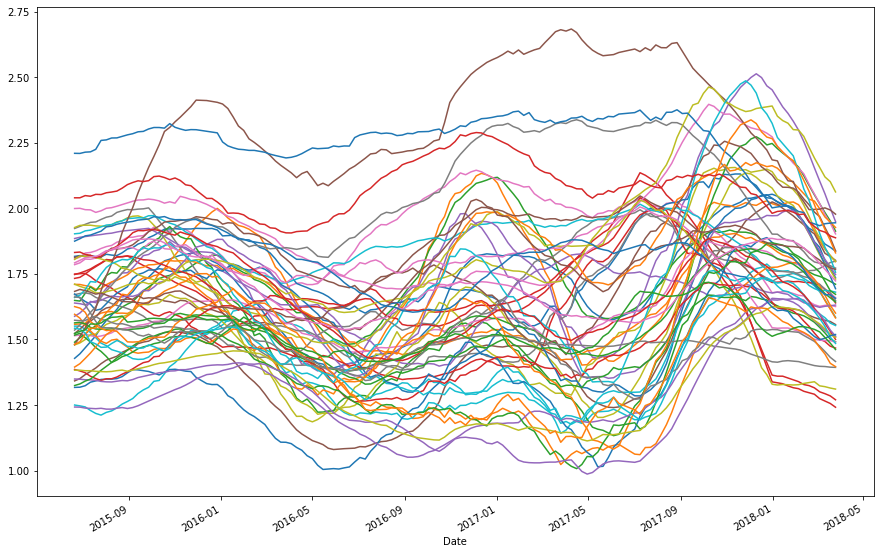

In [ ]:
graph_df.dropna().plot(figsize=(15,10), legend=False)

**No final obtive o resultado de como foi a variação média do preço ao longo do tempo**